# <center> **CNN model for MNIST dataset**

**Team Members**
- Darun Arumugham (110088300)
- Varshitha Seralathan (110087938)
   

<br> Table of Contents: 
* [1. Introduction](#1)
* [2. Importing Libraries](#2)
* [3. Data Preparation](#3)
    * [3.1 Loading MNIST dataset](#4)
    * [3.2 Exploratory Data Analysis](#5)
* [4. Data Preprocessing](#6)
    * [4.1 Normalization](#7)
    * [4.2 Reshaping](#8)
    * [4.3 Encoding](#9)
    * [4.3 Spliting dataset](#10)
* [5. Convolutional Neural Network](#11)
    * [5.1 Building Convolutional Model](#12)
    * [5.2 Model Fitting and Training](#13)
    * [5.3 Mode Evaluation](#14)
* [6. Prediction](#15)
    * [6.1 Prediction 1](#16)
    * [6.2 Prediction 2](#17)
* [7. Conclusion](#18)

<a id="1"></a>
## 1. INTRODUCTION

MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.

MNIST is short for Modified National Institute of Standards and Technology database.

MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

The dataset is already divided into training and testing sets.


![MNIST](https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/mnist_keras.gif)  





<a id="2"></a>
## 2. Importing Libraries 

Importing necessary libraries for analysing and building CNN architecture

Let's load the required libraries. From Keras, we need to import two main components:

Sequential from keras.models: Sequential is the keras abstraction for creating models with a stack of layers (MLP has multiple hidden layers, CNNs have convolutional layers, etc.).
Various types of layers from keras.layers: These layers are added (one after the other) to the Sequential model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,MaxPool2D# convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

from keras.utils.np_utils import to_categorical


<a id="3"></a>
## 3. Data Preparation

<a id="4"></a>
### 3.1 Loading MNIST Dataset

The data files *train.csv* and *test.csv* contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is *28 pixels* in height and *28 pixels* in width, for a total of 784 pixels in total. 
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [2]:
#The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
train = pd.read_csv("train.csv")
# The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.
test = pd.read_csv("test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (42000, 785)
Testing data size is (28000, 784)


Train dataset summary

In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Test dataset summary

In [6]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
#Data Cleaning
train.isna().any().any()
test.isna().any().any()

False

NOTE:
Data is totally clean in this case (since the final result says False which means it has no missing values)
There is no empty field. Data is clean already.

<a id="5"></a>
### 3.2 Exploratory Data Analysis

In [8]:
# Distribution of lables count in train dataset
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

C:\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


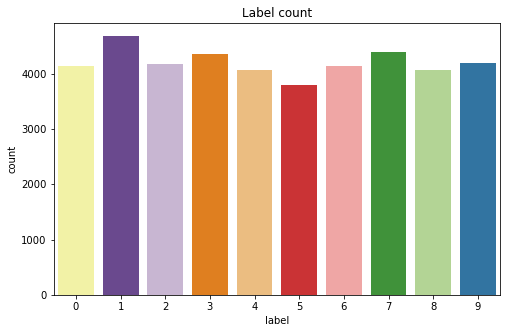

In [9]:
#Label count visulaization

plt.figure(figsize=(8, 5))
sns.countplot(train['label'], palette='Paired_r')
plt.title('Label count')
plt.show()

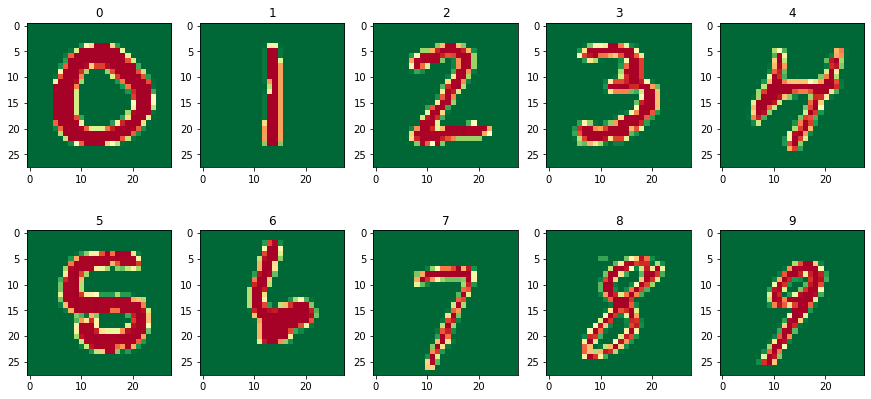

In [10]:
# Sample images from the training dataset

plt.figure(figsize=(15,7))
for i, c in enumerate(np.arange(0,10), start=1):
    t = train[train['label']==c].values[1]
    t = t[1:]
    plt.subplot(2,5,i)
    plt.title(c)
    plt.imshow(t.reshape(28,28), cmap='RdYlGn_r')

#### Checking images one by one

IMAGE LABEL: 4


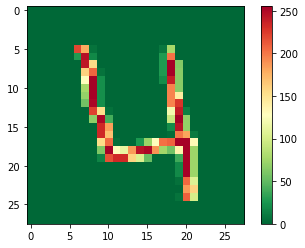

In [11]:
# Random image
digit_array = train.loc[3, "pixel0":]
arr = np.array(digit_array) 

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.RdYlGn_r)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(train.loc[3, "label"]))

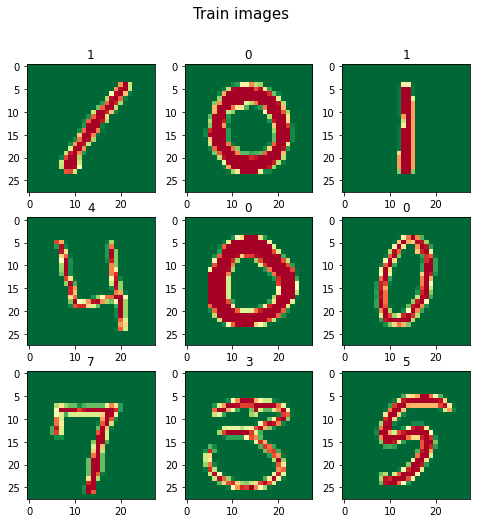

In [12]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(8, 8))
for ind, row in train.iloc[:9, :].iterrows():
    plt.subplot(3, 3, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=15)
    plt.axis('on')
    plt.imshow(img, cmap='RdYlGn_r')

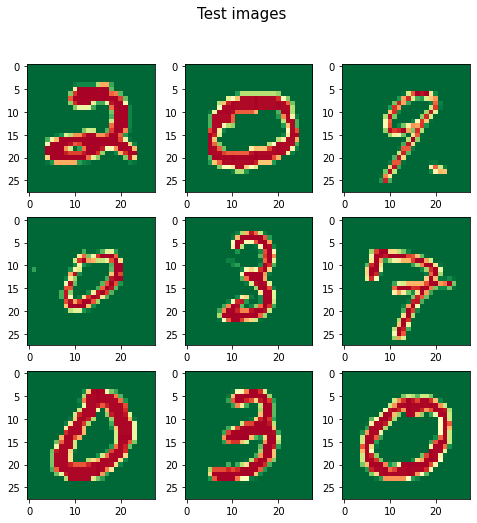

In [13]:
# first few test images
fig, ax = plt.subplots(figsize=(8, 8))
for ind, row in test.iloc[:9, :].iterrows():
    plt.subplot(3, 3, ind+1)
    img = row.to_numpy()[:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=15)
    plt.axis('on')
    plt.imshow(img, cmap='RdYlGn_r')

In [14]:
# split into image and labels and convert to numpy array
X = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

# test dataset
test = test.loc[:, :].to_numpy()

for i in [X, y, test]:
    print(i.shape)

(42000, 784)
(42000,)
(28000, 784)


<a id="6"></a>
## 4. Data Preprocessing

<a id="7"></a>
### 4.1 Normalization

To reduce the effects of illumination differences, we perform a grayscale normalization. Normalization increases the efficiency of the model.

In [15]:
X = X / 255.0
test = test / 255.0

<a id="8"></a>
### 4.2 Reshape

Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

In [16]:
# reshape dataset

# shape of training and test dataset
print(X.shape)
print(test.shape)

# reshape the dataframe to 3x3 matrix with 1 channel grey scale values
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

# shape of training and test dataset
print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)
(42000, 28, 28, 1)
(28000, 28, 28, 1)


<a id="9"></a>
### 4.3 Encoding 

A “one-hot encoded” vector is the best method to address this problem when making predictions about categorical data 

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [17]:
print(y.shape)
print(y[0])

# Converting to categorical by one-hot-encoding
y_enc = to_categorical(y, num_classes = 10)

print(y_enc.shape)
print(y_enc[0])

(42000,)
1
(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<a id="10"></a>
### 4.4 Spliting the dataset

We chose to split the train set in two parts : a small fraction (30%) became the validation set which the model is evaluated and the rest (70%) is used to train the model.

Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set.

In [18]:
random_seed = 2

#Split the train and the validation set for the fitting
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)

print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_val.shape)
print("y_train shape: ",y_train_enc.shape)
print("y_test shape: ",y_val_enc.shape)

x_train shape:  (29400, 28, 28, 1)
x_test shape:  (12600, 28, 28, 1)
y_train shape:  (29400, 10)
y_test shape:  (12600, 10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


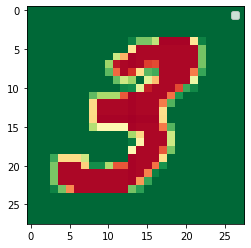

In [19]:
#Visualization of data
#Lets take one exammple
i = 20;
temp = X_train
plt.imshow(temp[i,:,:],cmap='RdYlGn_r')
plt.legend()
plt.show()

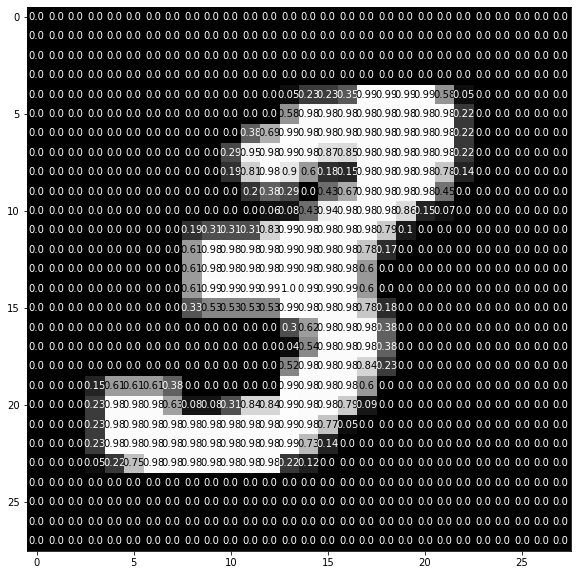

In [20]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(X_train[20].reshape(28,28), ax)

<a id="11"></a>
## 5. Convolutional Neural Network

![CNN](https://miro.medium.com/max/828/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

<a id="12"></a>
### 5.1 Building Convolutional Model


- The first is the convolutional (Conv2D) layer which is used to set learnable filters. In the first convolutional layer, 32 filters are used, while in the second convolutional layer, 64 filters are used. With each filter, a portion of the image (defined by the kernel size) is transformed. In kernel filtering, the kernel matrix is applied throughout the image. Essentially, filters transform images.

- Secondly, CNN must have a layer for pooling (MaxPool2D). It is simply a downsampling filter. Taking into account the two neighbouring pixels, it chooses the maximum value. The purpose of these is to reduce the computational cost, and to some extent also to reduce overfitting.

As a result of combining convolutional and pooling layers, CNN are able to generate a variety of local features.

- The dropout method is a regularization method in which a proportion of nodes are ignored randomly for each training sample. As a result of this technique, the network learns features in a distributed manner, reducing overfitting.

- 'relu' is the activation function of the rectifier (max(0,x)). A rectifier activation function adds nonlinearity to a network. Through batch normalization, the hidden unit values are shifted around less.

- A flatten layer is used to convert the final feature maps into a single 1D vector. It combines all the found local features of the previous convolutional layers.



In [21]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 20 # for better result increase the epochs
VERBOSE = 2

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

<a id="13"></a>
### 5.2 Model Fitting and Training

In [25]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/20
161/161 - 13s - loss: 0.6142 - accuracy: 0.8048 - val_loss: 0.1342 - val_accuracy: 0.9585 - 13s/epoch - 81ms/step
Epoch 2/20
161/161 - 10s - loss: 0.1541 - accuracy: 0.9544 - val_loss: 0.0952 - val_accuracy: 0.9719 - 10s/epoch - 65ms/step
Epoch 3/20
161/161 - 10s - loss: 0.1081 - accuracy: 0.9674 - val_loss: 0.0818 - val_accuracy: 0.9753 - 10s/epoch - 65ms/step
Epoch 4/20
161/161 - 12s - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.0707 - val_accuracy: 0.9786 - 12s/epoch - 76ms/step
Epoch 5/20
161/161 - 13s - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0673 - val_accuracy: 0.9790 - 13s/epoch - 82ms/step
Epoch 6/20
161/161 - 12s - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0605 - val_accuracy: 0.9821 - 12s/epoch - 73ms/step
Epoch 7/20
161/161 - 12s - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0545 - val_accuracy: 0.9837 - 12s/epoch - 73ms/step
Epoch 8/20
161/161 - 12s - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0603 - val_accuracy: 0.9830 - 12s/epoch - 73ms/step


<a id="14"></a>
### 5.3 Model Evaluation
After the model architecture is defined and compiled, the model needs to be trained with training data to be able to recognize the handwritten digits. Hence we will fit the model with X_train and y_train.

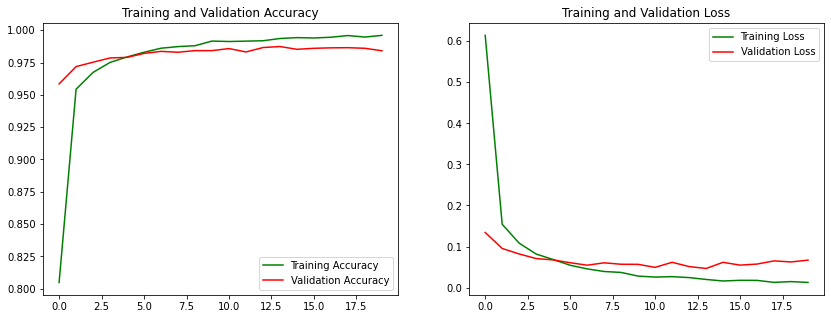

In [26]:
# Ploting the loss and accuracy curves for training and validation 
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],color='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],color='g', label='Training Loss')
plt.plot(history.history['val_loss'],color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

In [27]:
# model loss and accuracy on validation set
Loss,accuracy=model.evaluate(X_train, y_train_enc, verbose=False)

In [28]:
print("Accuray of the model: ", (accuracy));

Accuray of the model:  0.9940476417541504


### Accuray of the model : 0.996

In [29]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

394/394 [==============================] - 4s 9ms/step
[3.5583282e-15 1.5368887e-11 1.0000000e+00 1.6964040e-12 1.0868186e-17
 1.1660790e-18 2.1045094e-17 5.1864509e-11 8.4591292e-15 5.1282481e-18]
2


### Classification Report

In [30]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(OUTPUT_SHAPE)]
print(classification_report(y_act, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99      1218
     Class 1       0.99      1.00      0.99      1397
     Class 2       0.99      0.98      0.99      1287
     Class 3       0.99      0.98      0.99      1314
     Class 4       0.98      0.99      0.98      1256
     Class 5       0.98      0.99      0.98      1202
     Class 6       0.99      0.99      0.99      1214
     Class 7       0.98      0.99      0.98      1326
     Class 8       0.99      0.98      0.99      1182
     Class 9       0.99      0.97      0.98      1204

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



### Confusion Matrix

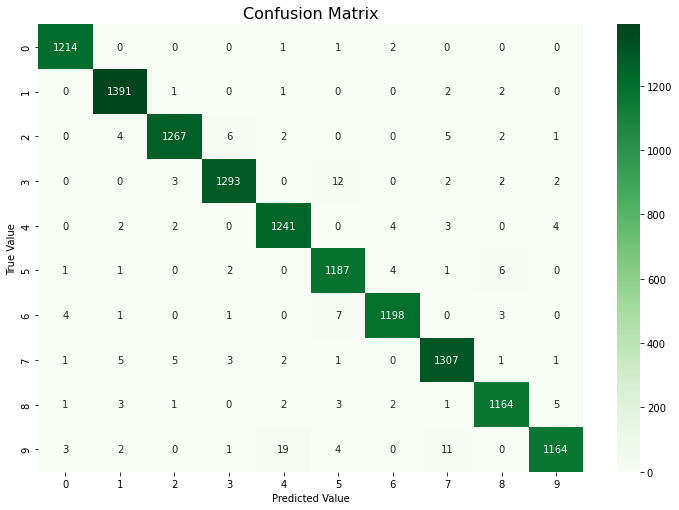

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, 
             fmt='1d', cmap='Greens',linecolor="gray", ax=ax)
ax.set_title('Confusion Matrix', fontsize=16)
plt.tight_layout()
ax.set_xlabel('Predicted Value')
ax.set_ylabel('True Value')
plt.show()

<a id="15"></a>
### 6. Prediction

Once the model is built and trained using the training data, that model is evaluated. Once the accuracy is as expected, the model is tested with the test dataset and the prediction is made.

<a id="15"></a>
### 6.1 Prediction 1

In [32]:
# predicted values
y_pred_enc = model.predict(test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

875/875 [==============================] - 8s 9ms/step
[9.68214766e-13 1.05087146e-11 1.00000000e+00 4.67994365e-10
 4.47809379e-14 1.75176459e-14 5.70013004e-13 3.29423377e-10
 1.08136666e-12 3.87559281e-14]
2


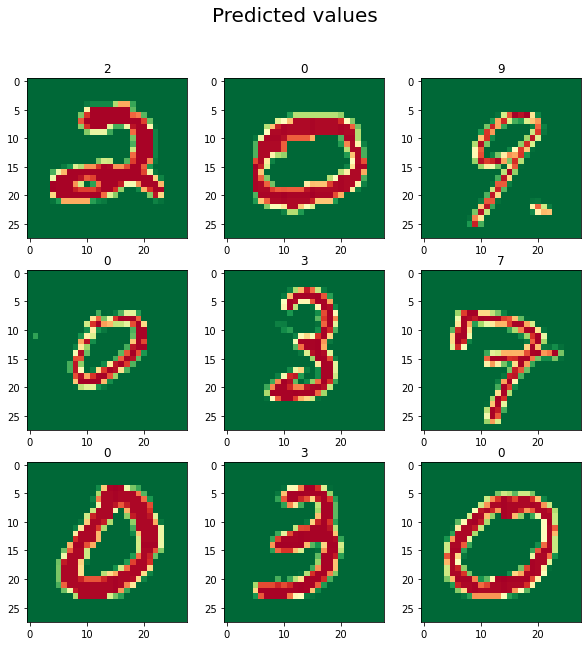

In [33]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(10, 10))
for ind, row in enumerate(test[:9]):
    plt.subplot(3, 3, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=20)
    plt.axis('on')
    plt.imshow(img, cmap='RdYlGn_r')

<a id="16"></a>
### 6.2 Prediction 2

1/1 [==============================] - 0s 37ms/step


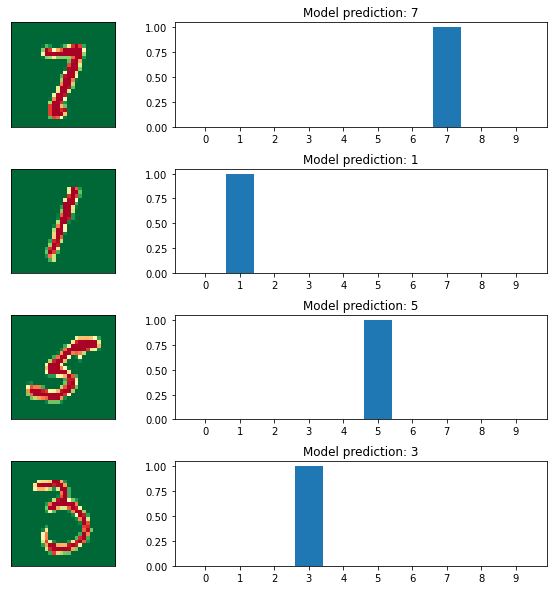

In [36]:
# predictions on randomly selected test images

num_test_images = test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test[random_inx, ...]
random_test_labels = y[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image),cmap='RdYlGn_r')
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Model prediction: {np.argmax(prediction)}")

plt.show()

<a id="17"></a>
## 7. Conclusion

An 80% dataset was used to train both models, while 20% was used to test them. The backpropagation approach in the models uses the ReLU activation function. Additionally, softmax activation function for the output's probabilistic values. The categorical cross-entropy loss was used for the training process. The loss was reduced by using the ADAM optimizer for additional optimization.